# **Evolution of Taylor Swift's Lyricism**
### by Christy Yee

March 14, 2022

---

# Introduction

Time in the limelight as long as that of Taylor Swift is rare in the volatile music industry. With a career spanning over 16 years and counting, 9 albums over 3 genres, and over 200 songs, whether you hate her or love her, it is no question that her discography is impressive. Often, music experts and her fans credit the reason for her continued relevance and success to her principal role and involvement in the songwriting and music production process of her albums. In particular, Taylor Swift has gained a reputation for her narrative songwriting style and detailed lyricism. As a result, through her transitions from country to pop to folk, she has managed to remain musically uniquely and authentically herself. As she matured from a wide-eyed teenaged country singer to an international sensation, her growth is evident through her musical evolution. With my research, I hope to investigate “How has the lexicon of Taylor Swift’s songwriting changed over time?”


## Motive
With my data analysis, I hope to provide organized, visual data for me and other dedicated Swifties to analyze her change and growth as a songwriter over time, and potentially predict her next moves. Furthermore, I’d be interested in determining the validity of criticisms that her songs are “[endlessly upbeat](https://www.vanityfair.com/style/2022/01/taylor-swift-one-hour-feud-with-damon-albarn).” Additionally, the data analysis of her lyricism could provide Taylor Swift newbies with a quick introduction to her songs and lyrical style and tendencies.


## Data
For my data analysis, I am using a dataset from [Kaggle](https://www.kaggle.com/thespacefreak/taylor-swift-song-lyrics-all-albums) entitled “Taylor Swift Song Lyrics (All Albums)” which includes lyrics of every song from her eponymous debut album to Fearless (Taylor’s Version), as listed below:
- Taylor Swift
- Fearless (Taylor's Version)
- Speak Now (Deluxe Version)
- Red (Deluxe Version)
- 1989 (Deluxe Version)
- reputation
- Lover
- folklore (Deluxe Version)
- evermore (Deluxe Version)

The entire dataset is organized into separate csv files for each album. Each row in an album’s table included data on the album name, track title, track number, lyric, and line number for each line of the file’s album. Each csv file will be read and converted into a pandas dataframe for my analysis.

Prioritizing Taylor's Version re-recordings and then Deluxe versions of albums when available (as the Kaggle datasets do) is ideal for my data analysis since this maximizes inclusion of her songs. However, the dataset only includes songs released within her albums, and therefore does not include songs she wrote for other artists or songs released along with films such as “Safe and Sound,” “I Don’t Want To Live Forever,” or “Only the Young” since they were released with Hunger Games, 50 Shades Darker, and Miss Americana respectively. For the purposes of my analysis, I will be only considering songs by Taylor Swift associated with one of her albums so that I can use the albums as my unit of change over time.

However, since the dataset has been published, Taylor Swift has released Red (Taylor's Version) which is a re-recording of her Red album, along with 9 additional previously unreleased Vault songs. Therefore, this dataset is missing these Vault songs. 

Taylor Swift has stated that the Vault songs on both the Fearless (Taylor's Version) and Red (Taylor's Version) were written during that era, but simply did not make that cut for the original release. Therefore, though the Vault songs were released more recently, they will be considered as songwriting from their respective album time periods.

### *Read Taylor Swift lyrics data from each album.*

In [2]:
import pandas as pd

In [3]:
albums = {}
albums["debut"] = pd.read_csv('data/01-taylor_swift.csv')
albums["Fearless"] = pd.read_csv('data/02-fearless_taylors_version.csv')
albums["Speak Now"] = pd.read_csv('data/03-speak_now_deluxe_package.csv')
albums["Red"] = pd.read_csv('data/04-red_deluxe_edition.csv')
albums["1989"] = pd.read_csv('data/05-1989_deluxe.csv')
albums["reputation"] = pd.read_csv('data/06-reputation.csv')
albums["Lover"] = pd.read_csv('data/07-lover.csv')
albums["folklore"] = pd.read_csv('data/08-folklore_deluxe_version.csv')
albums["evermore"] = pd.read_csv('data/09-evermore_deluxe_version.csv')

### *Perform exploratory data analysis to see summary statistics.*

In [4]:
for k in albums.keys():
    print(k.upper(), end=": ")
    print(albums[k].shape)

DEBUT: (609, 5)
FEARLESS: (1170, 5)
SPEAK NOW: (945, 5)
RED: (1072, 5)
1989: (1006, 5)
REPUTATION: (988, 5)
LOVER: (934, 5)
FOLKLORE: (722, 5)
EVERMORE: (912, 5)


In [5]:
for k in albums.keys():
    print(k.upper() + ": ")
    print(albums[k].head())
    print()

DEBUT: 
     album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5  

FEARLESS: 
                    album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’

In [6]:
for k in albums.keys():
    print(k.upper() +  ": ")
    print(albums[k].describe())
    print()

DEBUT: 
          track_n        line
count  609.000000  609.000000
mean     7.991790   22.095238
std      4.394404   13.619505
min      1.000000    1.000000
25%      4.000000   11.000000
50%      8.000000   21.000000
75%     12.000000   32.000000
max     15.000000   55.000000

FEARLESS: 
           track_n         line
count  1170.000000  1170.000000
mean     13.370940    23.754701
std       7.458526    14.226705
min       1.000000     1.000000
25%       7.000000    12.000000
50%      14.000000    23.000000
75%      20.000000    34.000000
max      26.000000    58.000000

SPEAK NOW: 
          track_n        line
count  945.000000  945.000000
mean     8.941799   29.088889
std      4.769674   17.536056
min      1.000000    1.000000
25%      5.000000   14.000000
50%      9.000000   28.000000
75%     13.000000   42.000000
max     17.000000   82.000000

RED: 
           track_n         line
count  1072.000000  1072.000000
mean     11.186567    25.932836
std       6.359939    15.729185
min 

In [7]:
for k in albums.keys():
    print(k + " has " + str(len(albums[k].track_title.unique())) + " songs")

debut has 15 songs
Fearless has 26 songs
Speak Now has 17 songs
Red has 22 songs
1989 has 16 songs
reputation has 15 songs
Lover has 18 songs
folklore has 17 songs
evermore has 17 songs


In [8]:
for k in albums.keys():
    print(k + "'s longest song has " + str(albums[k].line.max()) + " lines")

debut's longest song has 55 lines
Fearless's longest song has 58 lines
Speak Now's longest song has 82 lines
Red's longest song has 65 lines
1989's longest song has 85 lines
reputation's longest song has 80 lines
Lover's longest song has 66 lines
folklore's longest song has 67 lines
evermore's longest song has 69 lines


# Methodology

## Data Cleansing

Before I begin any analysis, I need to prepare my data and address its shortcomings. As previously stated, the dataset is not fully up to date as it was created before the release of Red (Taylor’s Version) and its new songs. Since the dataset acknowledged genius.com as the source of its data on its Kaggle website, I decided to extract the missing songs myself from [genius.com](genius.com) as well. Using the requests and BeautifulSoup modules, I extracted the names of the missing Vault songs from the Red (Taylor’s Version) album page. Then, along with the Genius API, I grabbed the lyrics for each song. With my new data, I appended the missing lyrics to the corresponding album. 

### *Use requests and BeautifulSoup to make a list of all 'From the Vault' songs on Red (Taylor's Version).*

In [9]:
import requests
from bs4 import BeautifulSoup

In [10]:
response = requests.get('https://genius.com/albums/Taylor-swift/Red-taylors-version')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [11]:
vaults = {}
datasets = document.find_all('a', attrs={'class':'u-display_block'})

for i in range(len(datasets)):
    if "Vault" in datasets[i].text:
        title = str(datasets[i].text.strip())
        end = title.find("]")
        title = title[:end + 1]
        vaults[title] = []

### *Use Genius API to scrape lyrics for new vault songs of Red's (Taylor's Version) that main dataset source is missing.*

In [12]:
pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /tmp/pip-req-build-txolbblr
  Running command git clone -q https://github.com/johnwmillr/LyricsGenius.git /tmp/pip-req-build-txolbblr
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit fa9528551043cd60376b900a0adacf239a93fae5
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44688 sha256=7b1b4308a8b1771ce953d62c355af879e8af2e140ed971df8aeeac37ca7d3063
  Stored in directory: /tmp/pip-ephem-wheel-cache-8m902228/wheels/22/d8/54/6e236bc9517965a346a5b6cd223931b13f1eb6ba8676f1078c
Successfully built lyricsgenius
Note: you may need to restart the kernel to use updated packages.


In [13]:
import lyricsgenius as genius
import geniusKey

api = genius.Genius(geniusKey.MY_KEY)

In [14]:
def populateLyrics(title):
    res = api.search_song(title)
    lines = res.lyrics.split('\n') 
    lines = [ x for x in lines if "[" not in x and x != ""]
    lines[-1] = lines[-1][:-7]
    vaults[title] = lines

In [15]:
for k in vaults.keys():
    populateLyrics(k)
title = "All Too Well (10 Minute Version) (Taylor's Version) [From the Vault]"
vaults[title][-1] = vaults[title][-1][:-1]

Searching for "Better Man (Taylor's Version) [From the Vault]"...
Done.
Searching for "Nothing New (Taylor's Version) [From the Vault]"...
Done.
Searching for "Babe (Taylor's Version) [From the Vault]"...
Done.
Searching for "Message In A Bottle (Taylor's Version) [From The Vault]"...
Done.
Searching for "I Bet You Think About Me (Taylor's Version) [From the Vault]"...
Done.
Searching for "Forever Winter (Taylor's Version) [From the Vault]"...
Done.
Searching for "Run (Taylor's Version) [From the Vault]"...
Done.
Searching for "The Very First Night (Taylor's Version) [From the Vault]"...
Done.
Searching for "All Too Well (10 Minute Version) (Taylor's Version) [From the Vault]"...
Done.


### *Append new data to existing dataframe for the Red album.*

In [16]:
def appendSong(title):
    size = len(vaults[title])
    a = {"album_name" : ["Red (Taylor's Version)"] * size, 
         "track_title": [title] * size, 
         "track_n": [-1] * size, # value unimportant bc column will be dropped later
         "lyric": vaults[title],
         "line": [ i for i in range(1, size + 1) ]
        }
    df = pd.DataFrame(a)
    df = pd.concat([albums["Red"], df])
    df.reset_index(drop=True, inplace=True)
    return df

In [17]:
for k in vaults.keys():
    albums["Red"] = appendSong(k)

# Replace the album name of "Red (Deluxe Edition)" to "Red (Taylor's Version)" for consistency. 
# This is possible because songs on the Red (Taylor's Version) album are simply re-recordings with identical lyrics as the songs on Red (Deluxe Edition).
albums["Red"] = albums["Red"].replace("Red (Deluxe Edition)", "Red (Taylor's Version)")

## Data Organization

Furthermore, since I plan to investigate overall lyrical data per song, not line by line, I decided to group my data entries by track title and store only a song’s total number of lines. Thus, my datasets are more concise and easier to work with. In doing so, I was also able to discover the presence of songs with multiple versions and thus repeated lyrics. I decided to drop the repeats and keep only the original version of these songs in order to prevent the repeats from polluting any results.

### *Group by track title within each dataframe by concatenating strings of line lyrics.*

In [18]:
def groupBySongs(df):
    df['lyric'] = df.groupby(['track_title'])['lyric'].transform(lambda x : ' '.join(x))
    df['line'] = df.groupby(df['track_title'])['line'].transform(lambda x : max(x))
    df.rename(columns={'line': 'lines'}, inplace=True)
    df.rename(columns={'lyric': 'lyrics'}, inplace=True)
    df.drop(columns=['track_n'], inplace=True)
    df.drop_duplicates(inplace=True)  
    df.reset_index(drop=True, inplace=True)
    return df
# lyric column now holds entirety of song's lyrics
# lines column now represents total number of lines in song

In [19]:
for k in albums.keys():
    albums[k] = groupBySongs(albums[k])

### *Drop lyrical repeats from different versions of the same song (acoustic/pop vs original).*

In [20]:
# drop "Teardrops on My Guitar (Pop Version)"
albums['debut'] = albums['debut'][albums['debut'].track_title != "Teardrops on My Guitar (Pop Version)"]
albums['debut'].reset_index(drop=True, inplace=True)

# drop Forever & Always (Piano Version) (Taylor's Version)
albums["Fearless"] = albums["Fearless"][albums["Fearless"].track_title != "Forever & Always (Piano Version) [Taylor’s Version]"]
albums["Fearless"].reset_index(drop=True, inplace=True)

# drop Treacherous (Original Demo Recording), Red (Original Demo Recording), and State of Grace (Acoustic Version)
albums["Red"] = albums["Red"][albums["Red"].track_title.str.contains('Demo') == False]
albums["Red"] = albums["Red"][albums["Red"].track_title.str.contains('Acoustic') == False]
albums["Red"].reset_index(drop=True, inplace=True)

Lastly, I wanted to ensure that my data was clean and readable, so I took one last opportunity to remove any non-ascii characters and strange stray phrases that I had seen pop into my dataset before I was ready to proceed.

### *Clean up lyrics. Ignore non-ascii characters.*

In [21]:
import re

def cleanLyrics():
    for k,v in albums.items():
        for i in range(len(v)):
            lyrics = albums[k].loc[i, 'lyrics']
            lyrics = re.sub(r'[^\x00-\x7F]+',' ', lyrics)
            lyrics = lyrics.replace("-", " ")
            lyrics = lyrics.replace("Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified", "")
            albums[k].loc[i, 'lyrics'] = lyrics
cleanLyrics()

## Exploratory Data Visualizations

Once my data was comprehensive and organized, I conducted preliminary exploratory analysis on the numerical values regarding track, line, and word count for each album over her career. 

In [22]:
import matplotlib.pyplot as plt

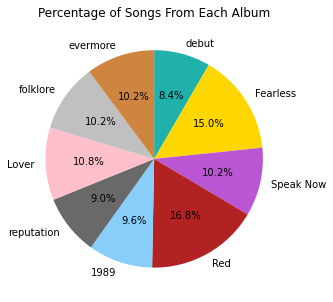

In [23]:
albumColors = ['lightseagreen', 'gold', 'mediumorchid', 'firebrick', 'lightskyblue', '#696969', 'pink', 'silver', 'peru']
plt.figure(figsize=(8,5))
plt.pie([albums[k]['track_title'].count() for k in albums.keys()], 
        labels=albums.keys(), 
        colors=albumColors, 
        startangle=90, 
        counterclock=False, 
        autopct='%1.1f%%')
plt.title("Percentage of Songs From Each Album")
plt.show()

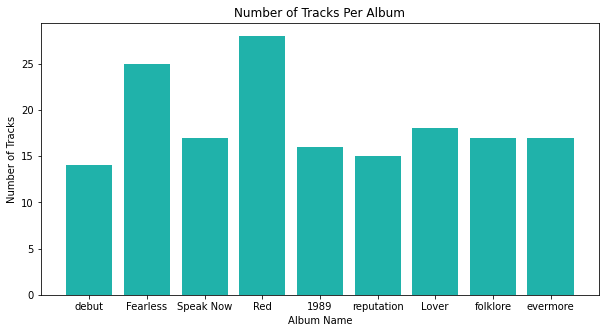

In [24]:
plt.figure(figsize=(10,5))
plt.bar(albums.keys(), [albums[k]['track_title'].count() for k in albums.keys()], color='lightseagreen')
plt.title("Number of Tracks Per Album")
plt.ylabel("Number of Tracks")
plt.xlabel("Album Name")
plt.show()

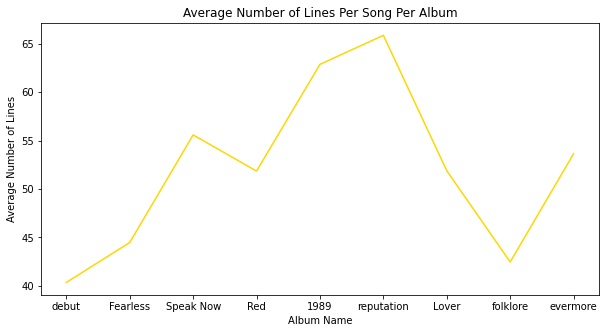

In [25]:
plt.figure(figsize=(10,5))
plt.plot(albums.keys(), [albums[k].lines.mean() for k in albums.keys()], color='gold')
plt.title("Average Number of Lines Per Song Per Album")
plt.ylabel("Average Number of Lines")
plt.xlabel("Album Name")
plt.show()

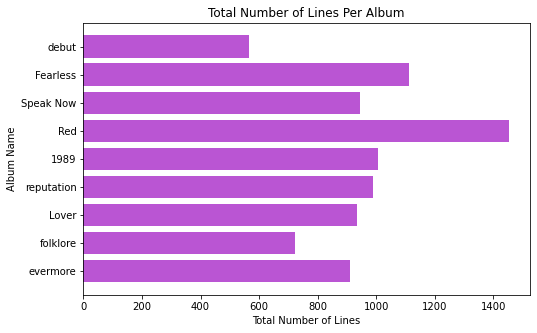

In [26]:
plt.figure(figsize=(8,5))
plt.barh(list(albums.keys()), [albums[k].lines.sum() for k in albums.keys()], color='mediumorchid')
plt.title("Total Number of Lines Per Album")
plt.gca().invert_yaxis()
plt.ylabel("Album Name")
plt.xlabel("Total Number of Lines")
plt.show()

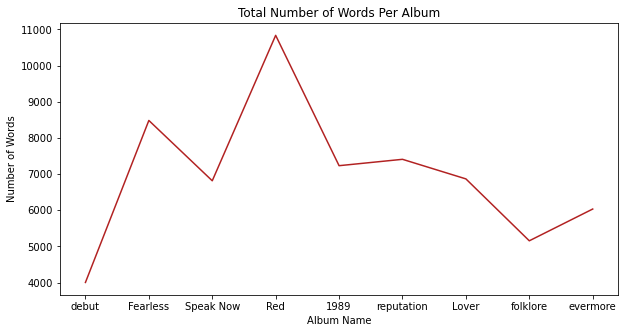

In [27]:
numWords = []
for k in albums.keys():
    sum = 0
    for i in range(len(albums[k])):
        sum += len(albums[k].lyrics[i].split())
    numWords.append(sum)

plt.figure(figsize=(10,5))
plt.plot(albums.keys(), numWords, color='firebrick')
plt.title("Total Number of Words Per Album")
plt.ylabel("Number of Words")
plt.xlabel("Album Name")
plt.show()

In all of the exploratory data analysis, it is clear that the Red album has the most amount of songs, words, and lines per album, followed consistently by Fearless. This data makes sense since these are the two albums which have Taylor's Versions and includes the additional previously-unreleased Vault songs. Furthermore, the Red album has by far the highest total number of words and lines per album, even far surprassing the numbers for Fearless, which makes sense since the album includes a 10-minute long song. On the other hand, her self-titled debut album has the least number of songs, total lines, average lines per song and words than any other album. 

Interestingly, although the Reputation album has the second-lowest number of songs, it also has the highest average number of lines per song, even surpassing Red with its 10-minute song. 

Additionally, the three albums that have won a Grammy for album of the year are Fearless, 1989, and folklore. However, there does not seem to be any pattern or connection between the three for number of songs, number of lines, average number of lines per song, or total number of words per album to indicate a predictable recipe for success. 

## Analytical Process
Next, it's time for the brunt of my analysis. In order to analyze how the lexicon of Taylor Swift’s songwriting has changed over time, I have two overarching focuses in mind. First, I want to analyze her lyrics by examining the frequency of her word choice and any change over time. Secondly, I plan to determine the sentimental and tonal quality of her lyrics, and their shifts across her discography. 


### Frequency Analysis 

In order to investigate the frequency of her choice of words in each album, I will start by tokenizing all lyrics while removing stopwords, punctuation, as well as stopwords specifically related to her corpus like filler words that represent nonsensical sounds such as “oh”, “mm”, and “da.” These tokens will then be stored as a Frequency Distribution.

Using the Frequency Distribution, I plan to find the most frequently used word per album and examine the change in frequency over time. To normalize my results, I plan to plot these frequencies as a percentage of the total number of words in its respective album so that inherently longer albums do not overpower a relatively higher word frequency in a shorter album.

Lastly, I will use the WordCloud library to generate word cloud visualizations to represent each album’s word frequency. Of course, the word clouds will be color-coordinated according to the album’s aesthetics. 


### Sentiment Analysis
Next, I want to analyze whether there are any tonal shifts over time. To do so, I will perform aggregate sentiment analysis using nltk’s VADER sentiment intensity analyzer  and add the positive, negative, and compound scores for each song to the dataset to be graphed and analyzed. 


# Results

## Frequency Analysis

### *Tokenize lyrics and remove stopwords and punctuation. Store results as a Frequency Distribution.*

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.probability import FreqDist
import numpy as np


def createFreqDists(drops):
    remove = stopwords.words('english') + list(punctuation) + drops
    remove.extend(['oh','mmmm', 'mm', 'na', 'di', 'ooh', 'ca', 'ah', 'ha', 'yeah', 'la', 'eh', 'da', 'hey'])
    # freqs =  nested dictionary with same keys as albums that maps albumName -> dictionary with album's track titles as keys that maps to the song's FreqDist
    freqs = {} 
    for k,v in albums.items():
        albumLyrics = []
        for i in range(len(v)):
            lyrics = albums[k].loc[i, 'lyrics']
            title = albums[k].loc[i, 'track_title']
            tokens = np.array(word_tokenize(lyrics.lower()))
            tokens = np.where(tokens == 'wan', 'wanna', tokens)
            edited = list(tokens)
            edited = [ word for word in tokens if word not in remove and word.isalpha()]
            albumLyrics.extend(edited)
        freqs[k] = FreqDist(albumLyrics)
    return freqs

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
freqs = createFreqDists([])

### *Determine most frequently used word per album.*

In [52]:
mostCommon = []
for k in freqs.keys():
    most = freqs[k].max()
    mostCommon.append(most)
    print(k + ":", most)

debut: know
Fearless: know
Speak Now: back
Red: like
1989: love
reputation: made
Lover: like
folklore: never
evermore: know


Taylor Swift's most frequently used words by album are "know," "back", "like", "love", "made", and "never." Interestingly, "know" is the most frequently used word in her first two and last albums. The albums towards the center of her discography like Red, 1989, and Lover are "like" and "love." 

However, reputation is an outlier in the middle with "made" as its most frequently word. The first single "Look What You Made Me Do" comes to mind, as well as "Don't Blame Me" which contains the repeated line "love made me crazy" in the chorus as the reason for this result. 

### Relative Frequency of Most Frequency Used Words Over Time
Now that all lyrics have been tokenized, pruned, and stored into Frequency Distributions and I have identified the most frequently used word per album, I can inspect how the relative frequency of the most common words change across albums.

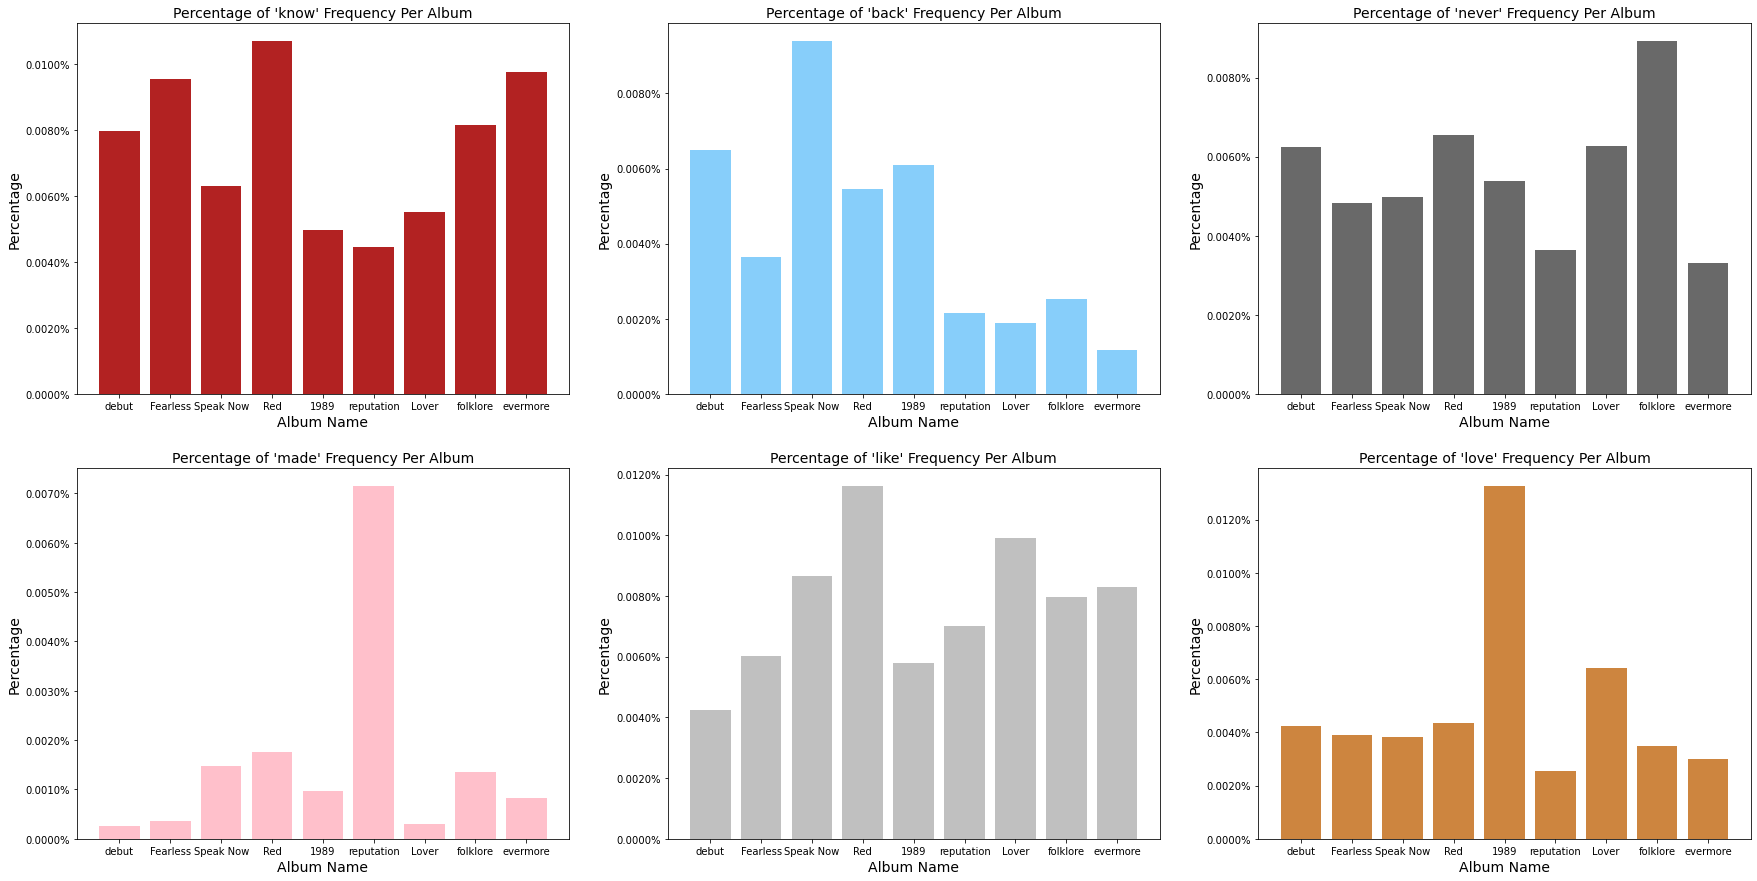

In [67]:
import math
import matplotlib.ticker as mtick


fig, ax = plt.subplots(2, 3, figsize=(30, 15))
color = 3
i = 0
for word in set(mostCommon):
    r = math.floor(i/3)
    c = i%3
    
    wordPercentages = []
    wordFreqs = [freqs[k][word] for k in freqs.keys()]
    for j in range(len(wordFreqs)):
        wordPercentages.append(wordFreqs[j]/numWords[j])
    
    ax[r, c].bar(freqs.keys(), wordPercentages, color=albumColors[color])
    ax[r, c].set_title("Percentage of '" + word + "' Frequency Per Album", fontsize=14)
    ax[r, c].set_ylabel("Percentage", fontsize=14)
    ax[r, c].set_xlabel("Album Name", fontsize=14)
    ax[r, c].yaxis.set_major_formatter(mtick.PercentFormatter())

    i += 1
    color += 1

Now, I want to compare the results of most frequently used word with their relative frequency within their album. Although "know" was the most frequently used word for the debut, Fearless, and evermore albums, Red has a higher relative frequency of "know." However, for the other albums, their most frequently used word top their charts. More interestingly, however, "love" is by far the most common word in 1989 as is "made" in reputation. Furthermore, there is a clear downward-facing trend of a less frequent use of the word "back."

### Album WordClouds

In [57]:
# lyrics =  dictionary with same keys as albums that maps albumName -> ALL lyrics
lyrics = {}
for k in albums.keys():
    words = " ".join(list(albums[k].lyrics))
    lyrics[k] = words

In [59]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

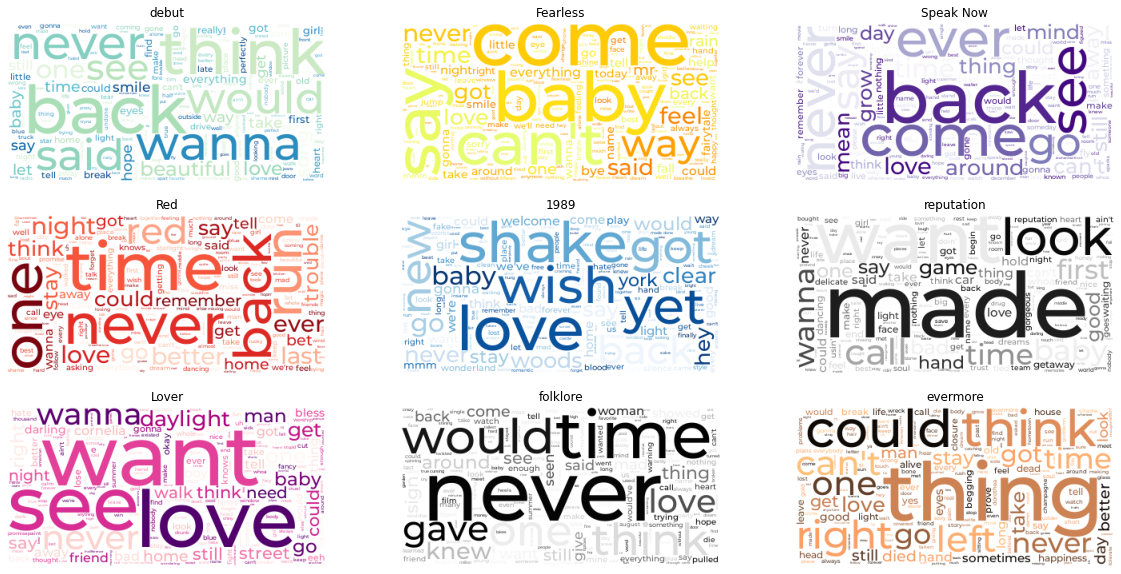

In [65]:
remove = ['oh','mmmm', 'mm', 'na', 'di', 'ooh', 'ca', 'ah', 'ha', 'yeah', 'la', 'eh', 'da', 'ra', "i'm", "i'll", "i've", "i'd", "cause"]
remove.extend(stopwords.words('english'))
remove.extend(drops)
colormaps = ['GnBu', 'Wistia', 'Purples', 'Reds', 'Blues', 'binary', 'RdPu', 'Greys', 'copper']

i = 0
fig = plt.figure(figsize=(20,10))
for k in lyrics.keys():
    words = lyrics[k].lower()
    wordcloud = WordCloud(font_path="data/Montserrat-Medium.ttf", 
                          stopwords=remove, collocations=False, 
                          background_color="white", 
                          colormap=colormaps[i]).generate(words)
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(k)
    ax.imshow(wordcloud)
    ax.axis('off')
    i += 1

The album word clouds better visualize the most frequently used words per album to give a sense of each individual album, as well as her discography as a whole. For example, her debut album appears particularly wistful of the past with standout words like "think, "back," "would," and "wanna," while 1989 appears more focused on future and coming changes with standout words like "wish," "love," "shake," "new," and "yet." Overall, wanting and nevers appear to be a common theme throughout her career. 

## Sentiment Analysis

### *Perform aggregate sentiment analysis for each song on each album.*

In [68]:
from nltk.sentiment import vader
nltk.download('vader_lexicon')

def addSentiments(key):
    sia = vader.SentimentIntensityAnalyzer()
    posSentiments = []
    negSentiments = []
    comSentiments = []
    for lyric in albums[key].lyrics:
        posSentiments.append(sia.polarity_scores(lyric)['pos']*100)
        negSentiments.append(sia.polarity_scores(lyric)['neg']*100)
        comSentiments.append(sia.polarity_scores(lyric)['compound']*100)
    albums[k]['positive sentiment'] = posSentiments
    albums[k]['negative sentiment'] = negSentiments
    albums[k]['compound sentiment'] = comSentiments

for k in albums.keys():
    sentiments = addSentiments(k)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Negative/Positive Sentiment Analysis Scores Per Song Per Album

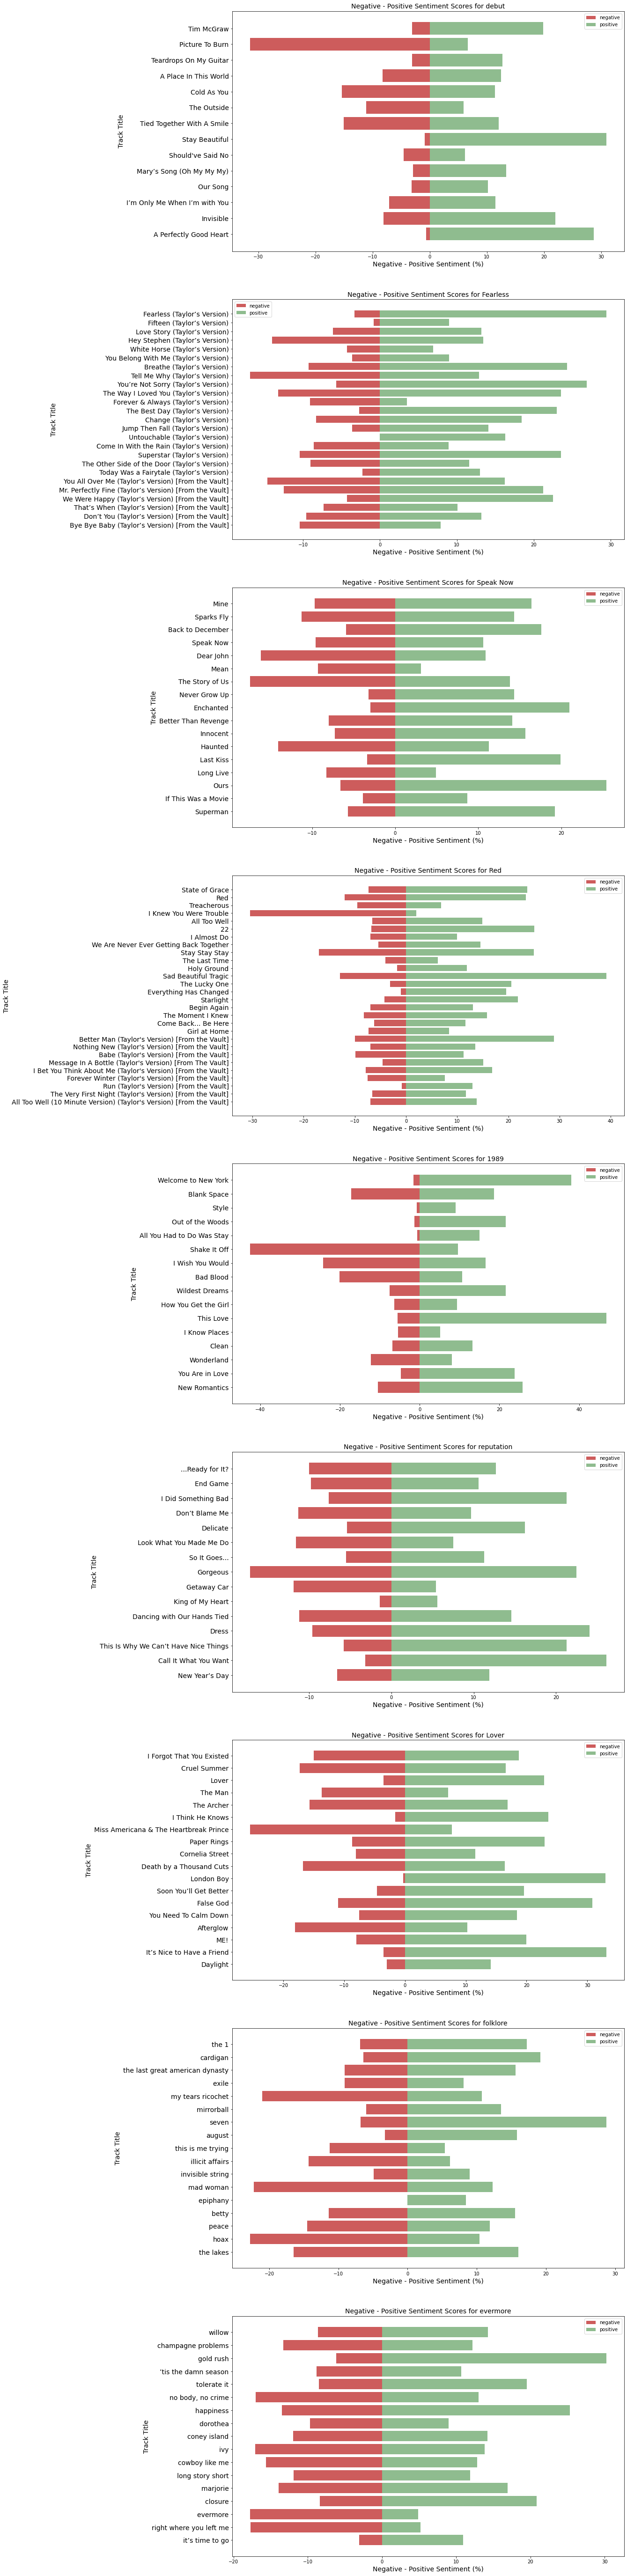

In [69]:
def plotPosNegSentiments():
    i = 0
    fig = plt.figure(figsize=(15,100))
    for key in albums.keys():
        size = len(albums[key])
        neg_sentiments = albums[key]['negative sentiment']
        pos_sentiments = albums[key]['positive sentiment']

        ax = fig.add_subplot(9,1,i+1)
        ax.barh(np.arange(size),
                -neg_sentiments,
                color='IndianRed',
                label='negative')
        ax.barh(np.arange(size),
                pos_sentiments,
                color='DarkSeaGreen',
                label='positive')

        ax.set_yticks(np.arange(size))
        ax.set_yticklabels(albums[key]['track_title'], fontsize=14)
        ax.set_ylabel('Track Title', fontsize=14)
        ax.set_xlabel('Negative - Positive Sentiment (%)', fontsize=14)
        ax.invert_yaxis()
        ax.set_title('Negative - Positive Sentiment Scores for ' + key, fontsize=14)
        ax.legend(loc='best')
        
        i += 1
        
    plt.subplots_adjust(wspace=0.75)

plotPosNegSentiments()

Looking at the ranges of values for the positive and negative sentiment scores for each song within an album, most albums’ songs have negative sentiment scores near -15%, and have positive sentiment scores around 25%. However, there are a few exceptions. For example, though the sentiment scores for the debut, Red, and 1989 albums fall roughly within the range of (-15%, 25%) as well, these albums also appear to have particularly polarizing songs as outliers. In her debut album, “Picture to Burn” is exceptionally negative, while “Stay Beautiful” and “A Perfectly Good Heart” is exceptionally positive. Likewise, “Shake it Off” is especially negative in 1989, while “Stay Stay Stay” and “This Love ”is especially positive. 

Furthermore, starting with Lover, Taylor Swift’s later albums and songs begin to shift slightly towards the (-20%, 20%) range. For Lover and folklore, this seems to be the case because each song becomes more distinctly negative or positive compared to earlier songs that had more equal positive and negative values. On the other hand, while evermore songs fall within (-20%,20%) like its neighbors, each song’s positive and negative values become more even again like her old music.

Overall, Red and 1989 have the widest total range of sentiment scores at (-30%,40%) and (-40%,40%).

### Compound Sentiment Analysis Scores Per Song Per Album

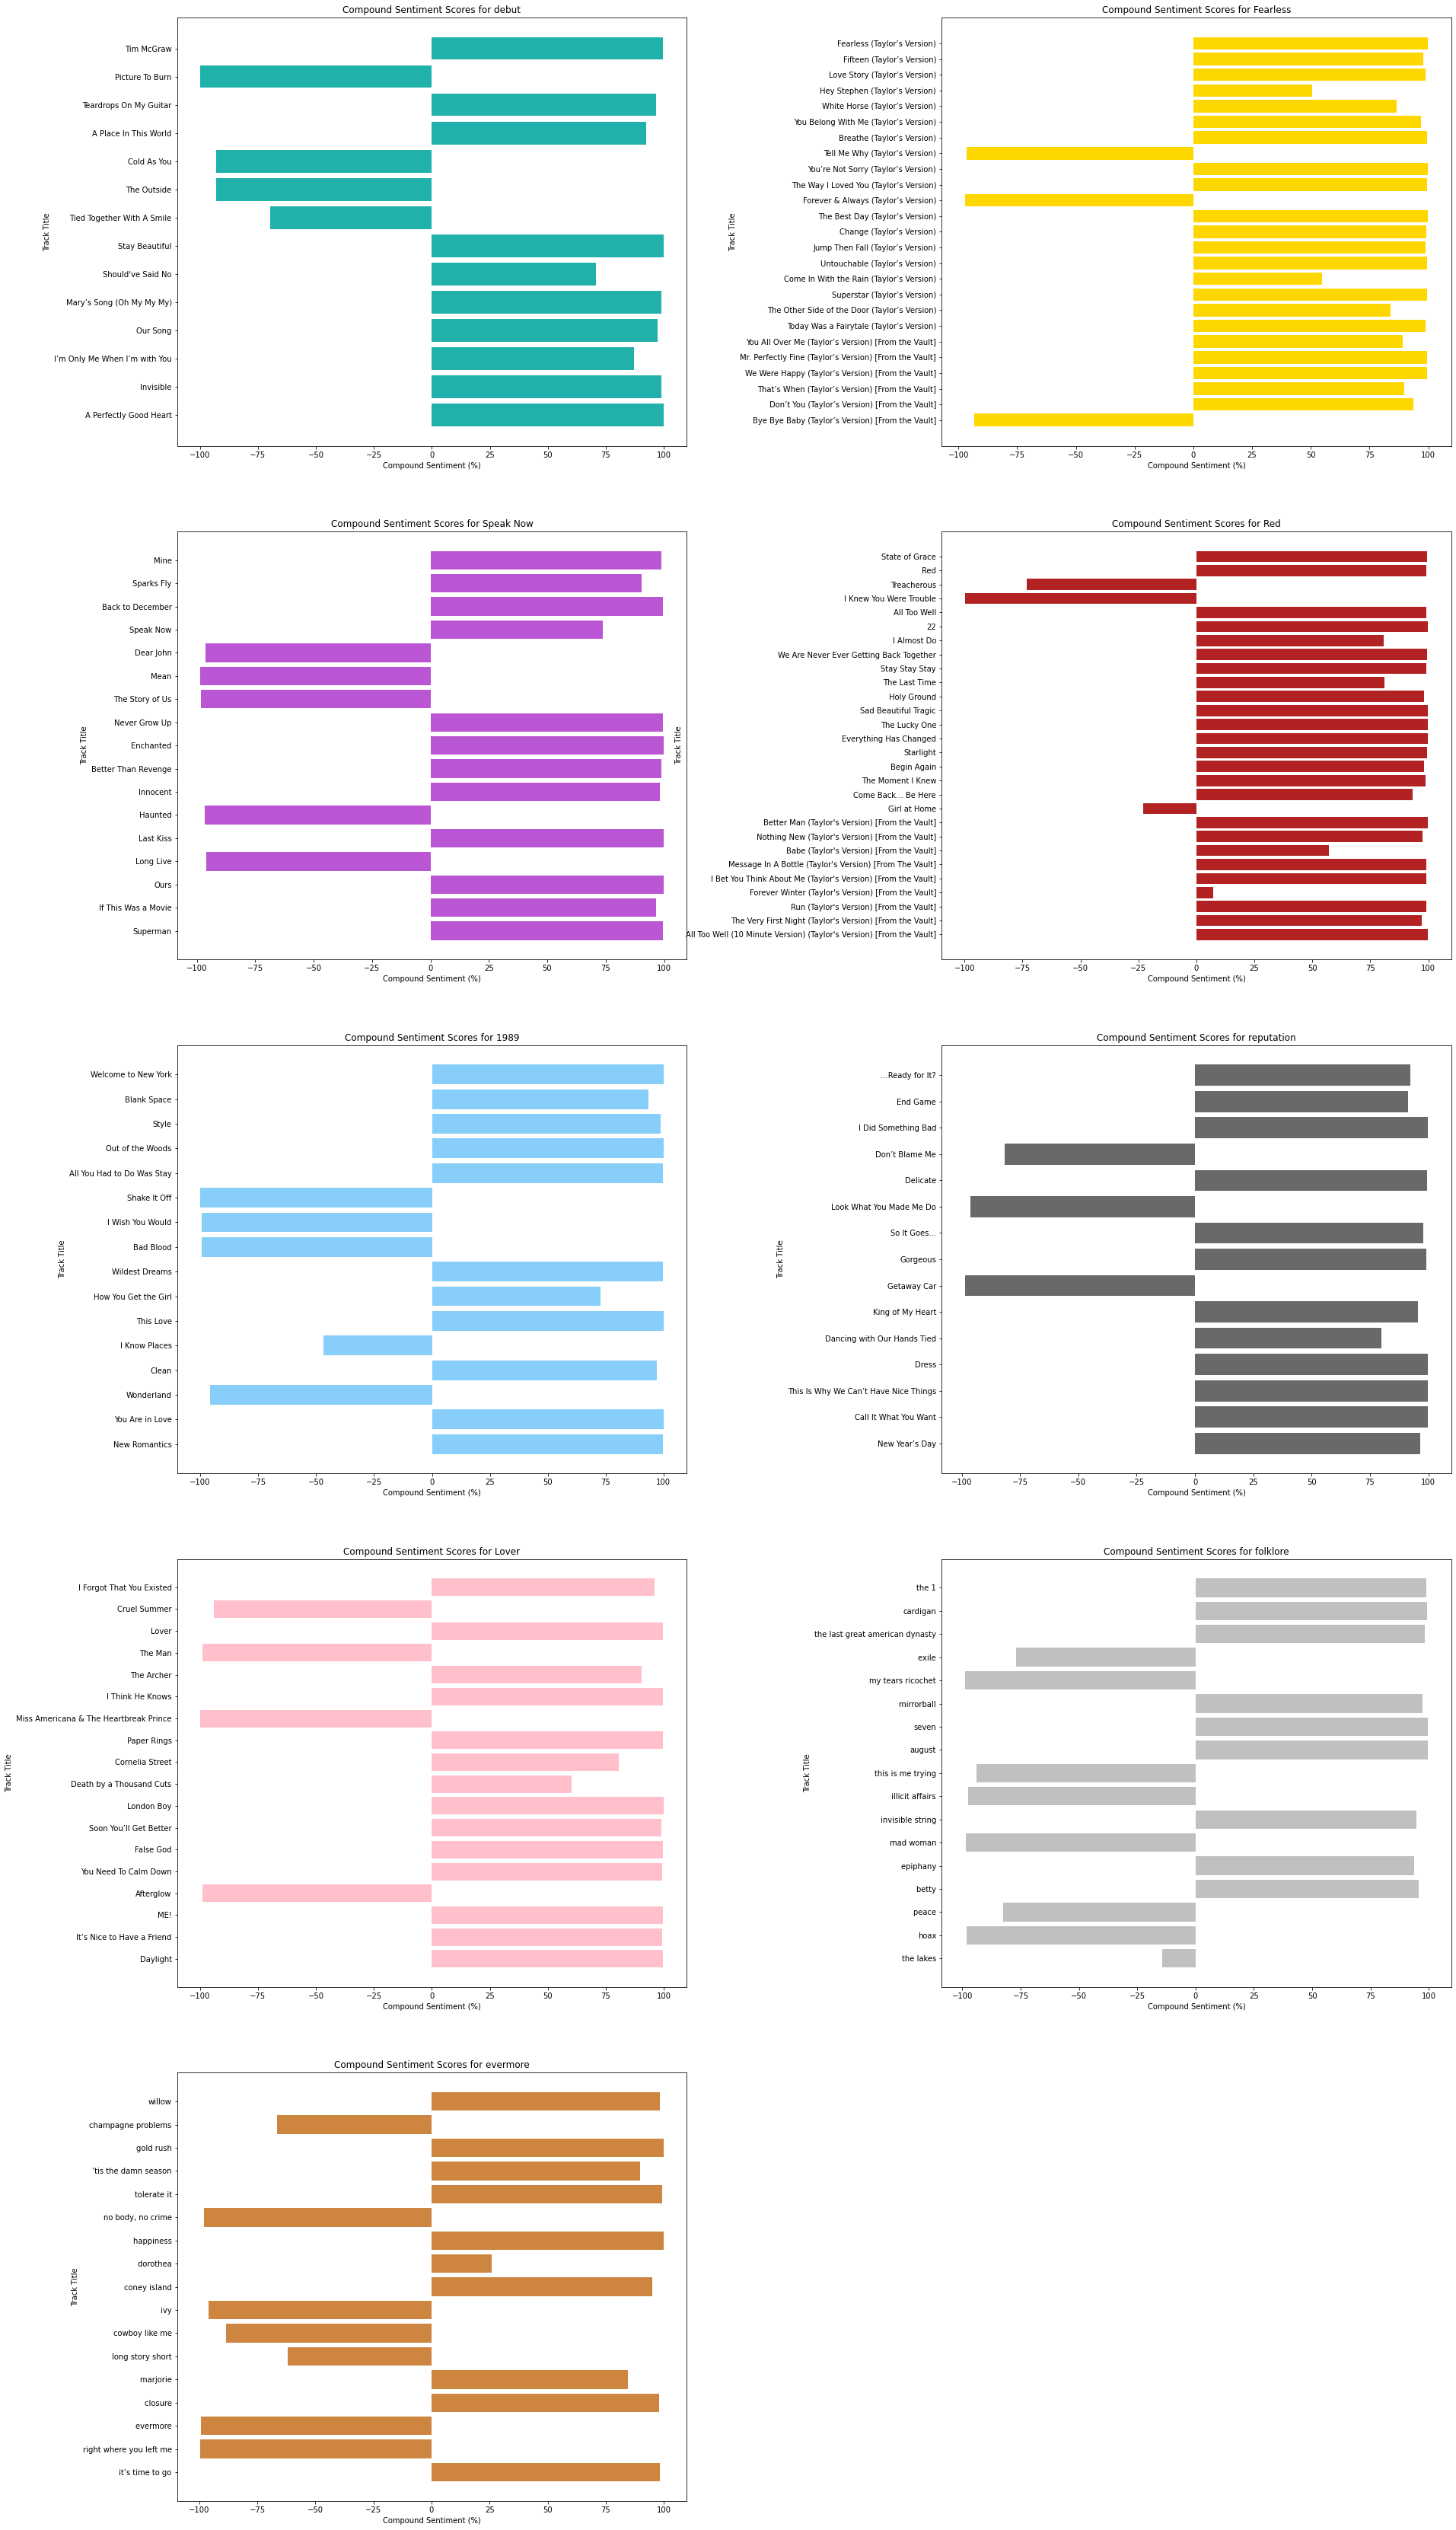

In [70]:
def plotCompoundSentiments():
    i = 0
    fig = plt.figure(figsize=(30,60))
    for key in albums.keys():
        size = len(albums[key])
        sentiments = albums[key]['compound sentiment']

        ax = fig.add_subplot(5,2,i+1)
        ax.barh(np.arange(size),
                        sentiments,
                        color=albumColors[i])


        ax.set_yticks(np.arange(size))
        ax.set_yticklabels(albums[key]['track_title'])
        ax.set_ylabel('Track Title')
        ax.set_xlabel('Compound Sentiment (%)')
        ax.invert_yaxis()
        ax.set_title('Compound Sentiment Scores for ' + key)

        i += 1
        
    plt.subplots_adjust(wspace=0.5)

plotCompoundSentiments()

Looking at my data visualizations, her albums have a history of having roughly 3-5 more negative-leaning songs. However, starting with folklore, the number of negatively sentimented songs increase sharply to 8. Furthermore, before folklore, each album ranged from 3/28 or 10.71% negative songs to max of 5/16 or 31.25% negative songs. On the other hand, nearly half of folklore's songs have overall negative sentiment at 8/17 or 47.06%. Likewise, 7/16, or 43.75% of evermore songs are negative. Therefore, her newest albums are clearly becoming more complex and less straightforwardly happy and pop-py, contrasting popular misconceptions about her.

### Average Compound Sentiment Analysis Scores By Album

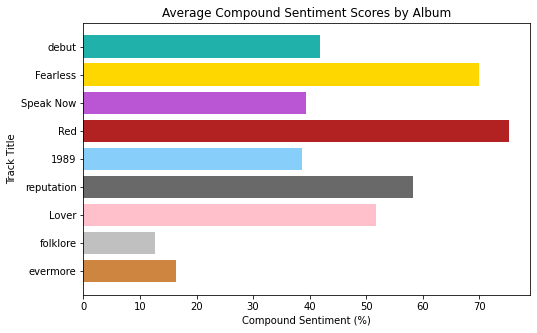

In [71]:
means = []
for k in albums.keys():
    means.append(albums[k]['compound sentiment'].mean())

plt.figure(figsize=(8,5))
plt.barh(list(albums.keys()), means, color=albumColors)
plt.title("Average Compound Sentiment Scores by Album")
plt.gca().invert_yaxis()
plt.ylabel("Track Title")
plt.xlabel("Compound Sentiment (%)")
plt.show()

The results of the average compound sentiment scores by album further reiterate the results of my previous visualizations for the compound sentiment scores broken down by songs. As seen above, folklore and evermore have a significantly lower compound sentiment scores compared to their predecessors. Furthermore, Fearless and Red appear to be stand-out more positive albums. 

# Discussion

In beginning my research, I sought to analyze lyrics by Taylor Swift in order to discover a pattern in her songwriting, either through her most commonly used words and their relative frequencies  or through the tonal values of her lyricism. 

Investigating word frequencies, while telling of her common themes and ideas of each individual album and over her career, revealed little trends over time. After turning to sentiment analysis, however, I was able to better understand her songwriting. It should be noted upon further inspection, nltk’s VADER sentiment intensity analyzer at times scores songs incorrectly based on my knowledge of Taylor Swift’s work. For example,“Sad Beautiful Tragic”  in the Red album appears more positive than negative. Though the song does reminisce about happier times in a relationship, it is ultimately about a divorce. However, despite a couple of outliers, the sentiment score results appear accurate. 

When diving into the positive, negative, and compound sentiment analysis scores for her songs per album, a more obvious pattern becomes apparent. The folklore album marks a clear shift in the tone of her lyrics towards a more negative, nuanced songwriting style. This could be indicative of her current musical journey and stage in life, and may likely continue as an ongoing trend for her next album. Furthermore, with the low average compound sentiment scores of roughly 12% and 17% for the folklore and evermore albums respectively, I believe the results of this data analysis adequately prove that Taylor Swift’s songs cannot be rightfully generalized as “endlessly upbeat” given the range of emotions present in her sentiment analysis scores. 

It may also be interesting to note that the two outlier albums with the highest average compound sentiment scores are Fearless and Red. Coincidentally, these albums are also the only two with Taylor’s Versions. This could imply that it is the addition of the previously-unreleased Vault songs on each album that may have been happier and increased their respective averages after their re-release.